## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("./QueryResults.csv", header=0)
df.columns = ['DATE', 'TAG', 'POSTS']

**Challenge**: Examine the first 5 rows and the last 5 rows of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
shape = df.shape
dimensions = df.ndim
print(f"Shape: {shape}\nDimensions: {dimensions}")

Shape: (2496, 3)
Dimensions: 2


**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     2496
TAG      2496
POSTS    2496
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby("TAG").sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,43080
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,398081
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1597946
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,797051
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51109
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,70114
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1902718
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2505039
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,67761


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
df.groupby("TAG")["DATE"].count()

TAG
assembly      180
c             180
c#            181
c++           180
delphi        180
go            165
java          180
javascript    180
perl          180
php           180
python        180
r             178
ruby          180
swift         172
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df["DATE"].iloc[1]

'2008-08-01 00:00:00'

In [9]:
type(df.DATE[1])

str

In [10]:
df["DATE"] = pd.to_datetime(df["DATE"])
print(type(df["DATE"][1]))
df["DATE"]

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
2491   2023-07-01
2492   2023-07-01
2493   2023-07-01
2494   2023-07-01
2495   2023-07-01
Name: DATE, Length: 2496, dtype: datetime64[ns]

## Data Manipulation
Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called ```reshaped_df```. 


In [11]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,180.0,1265.0,4909.0,2572.0,143.0,639.0,5538.0,10538.0,95.0,2282.0,15556.0,3831.0,301.0,1367.0
2023-04-01,197.0,1188.0,3849.0,1967.0,121.0,516.0,4496.0,8312.0,56.0,1941.0,12452.0,3106.0,220.0,1097.0
2023-05-01,176.0,1051.0,3848.0,1784.0,114.0,426.0,4199.0,7808.0,54.0,1976.0,11831.0,2866.0,256.0,1002.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [12]:
reshaped_df_dimensions = reshaped_df.ndim
reshaped_df_shape = reshaped_df.shape
print(f"Reshaped DataFrame Dimensions:  {reshaped_df_dimensions}")
print(f"Reshaped DataFrame Shape: {reshaped_df_shape}")

Reshaped DataFrame Dimensions:  2
Reshaped DataFrame Shape: (181, 14)


In [13]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [14]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-03-01,180.0,1265.0,4909.0,2572.0,143.0,639.0,5538.0,10538.0,95.0,2282.0,15556.0,3831.0,301.0,1367.0
2023-04-01,197.0,1188.0,3849.0,1967.0,121.0,516.0,4496.0,8312.0,56.0,1941.0,12452.0,3106.0,220.0,1097.0
2023-05-01,176.0,1051.0,3848.0,1784.0,114.0,426.0,4199.0,7808.0,54.0,1976.0,11831.0,2866.0,256.0,1002.0
2023-06-01,157.0,895.0,3833.0,1828.0,118.0,524.0,4327.0,7597.0,54.0,1923.0,11358.0,2679.0,228.0,1142.0
2023-07-01,179.0,1029.0,4238.0,2109.0,104.0,559.0,4733.0,8265.0,75.0,2080.0,12475.0,2480.0,236.0,1251.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [15]:
reshaped_df.count()

TAG
assembly      180
c             180
c#            181
c++           180
delphi        180
go            165
java          180
javascript    180
perl          180
php           180
python        180
r             178
ruby          180
swift         172
dtype: int64

In [16]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [17]:
reshaped_df.fillna(value=0, inplace=True)  # Filling the NaN (Not a Number) cell values with zero and applying changes.
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


### Check for NaN Values

In [18]:
reshaped_df.isna().values.any()
# Now we're all set to create some charts and visualise our data. For all of that and more, I'll see you in the next lesson!

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [19]:
import matplotlib.pyplot as plt

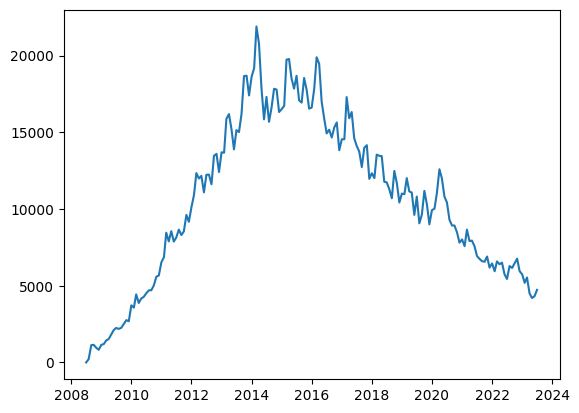

In [24]:
# Plotting java
plt.plot(reshaped_df.index, reshaped_df["java"])

## Styling the Chart

Let's look at a couple of methods that will help us style our chart:

* ```.figure()``` - allows us to resize our chart

* ```.xticks()``` - configures our x-axis

* ```.yticks()``` - configures our y-axis

* ```.xlabel()``` - add text to the x-axis

* ```.ylabel()``` - add text to the y-axis

* ```.ylim()``` - allows us to set a lower and upper bound



### To make our chart larger we can provide a width (16) and a height (10) as the ```figsize``` of the figure.
This will make our chart easier to see. But when we increase the size of the chart, we should also increase the fontsize of the ticks on our axes so that they remain easy to read:

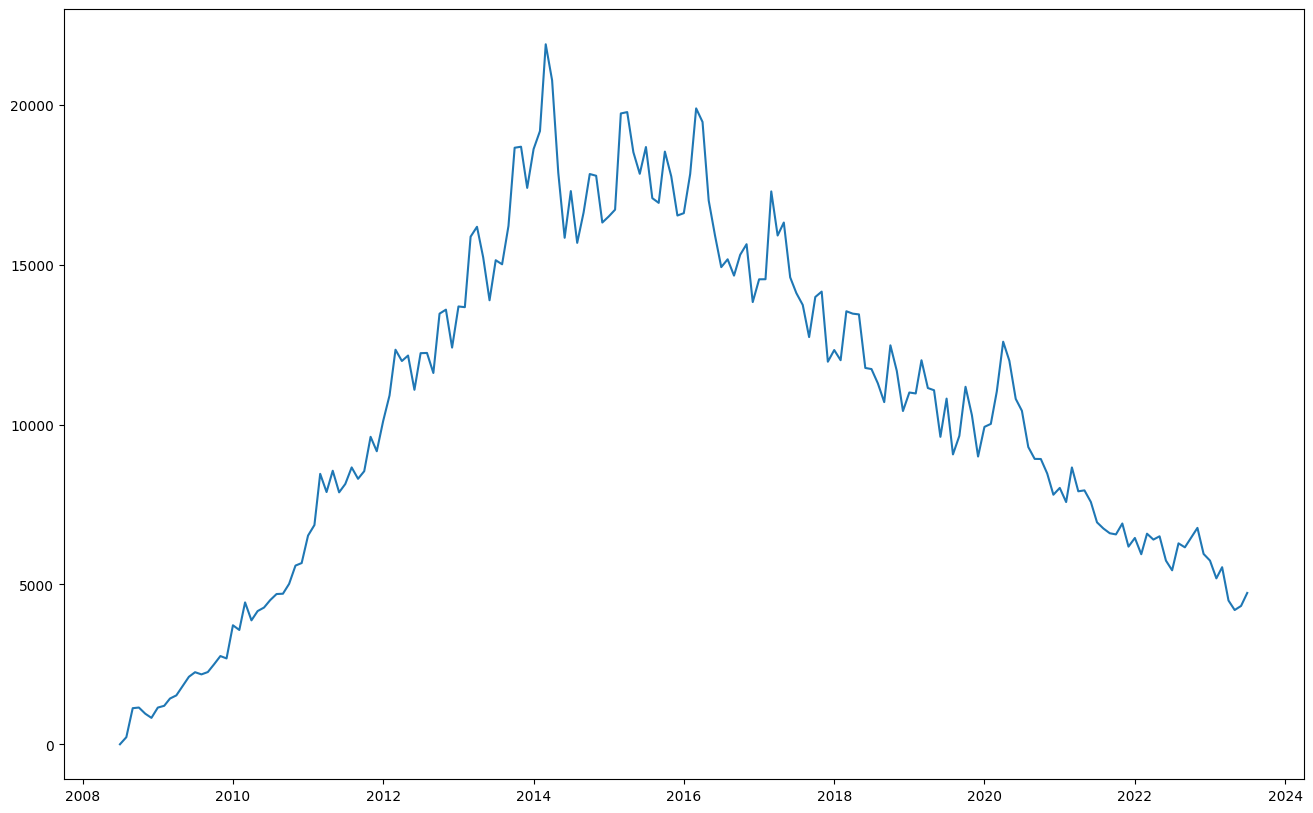

In [27]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

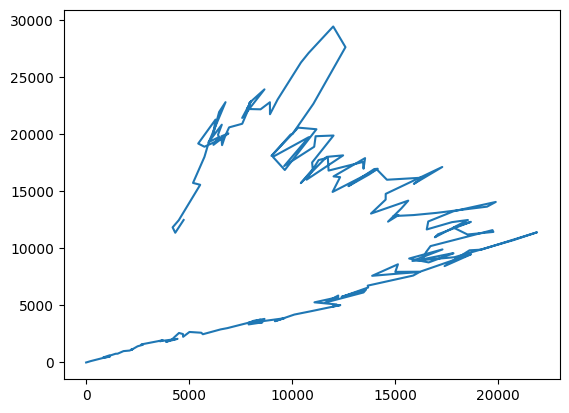

In [26]:
plt.plot(reshaped_df["java"], reshaped_df["python"])

### Now we can add labels. Also, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with ```.ylim()```.
Challenge: Try to plot both python and java together?

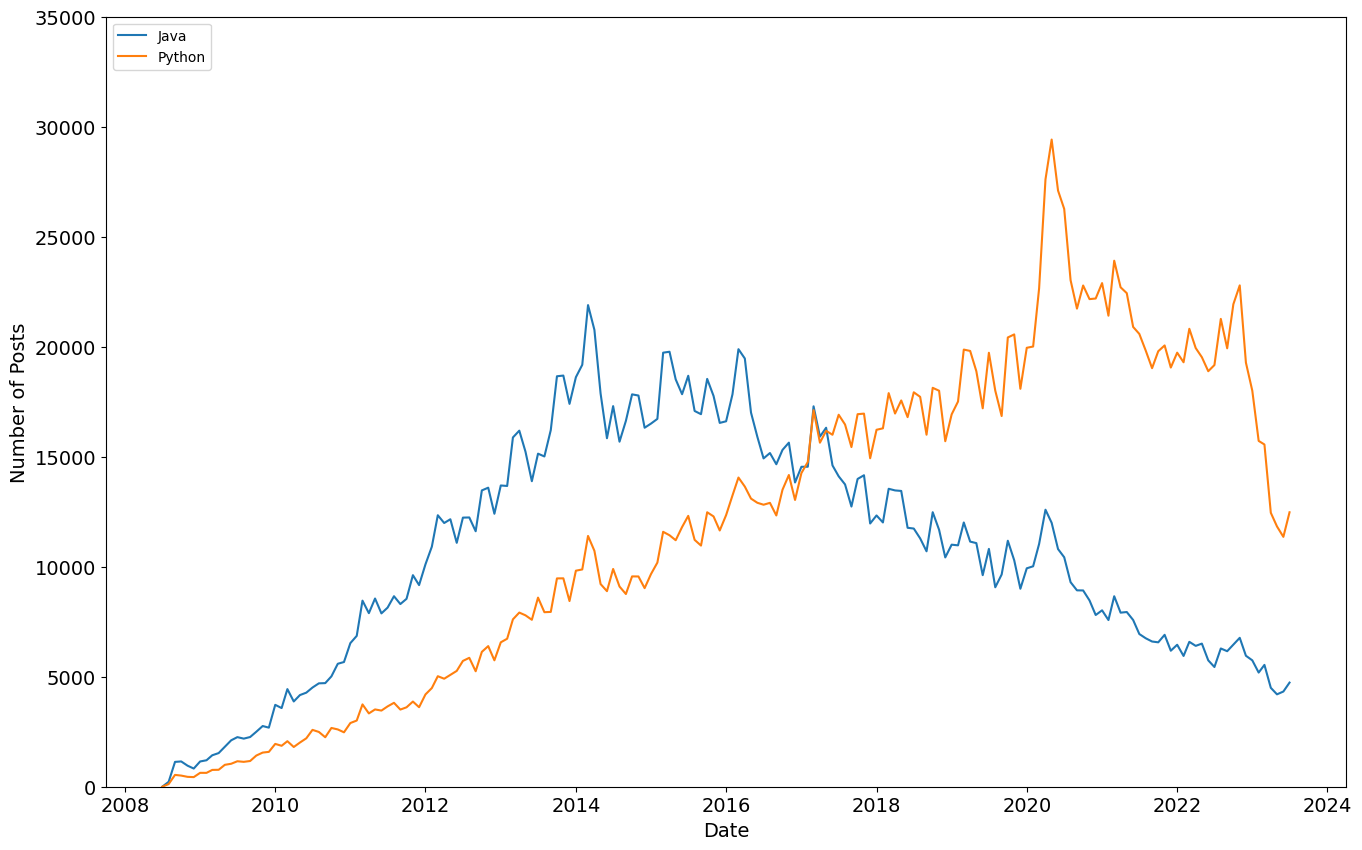

In [35]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java, label="Java")
plt.plot(reshaped_df.index, reshaped_df.python, label="Python")
plt.legend(loc="upper left")

### What if we wanted to plot all programming languages?


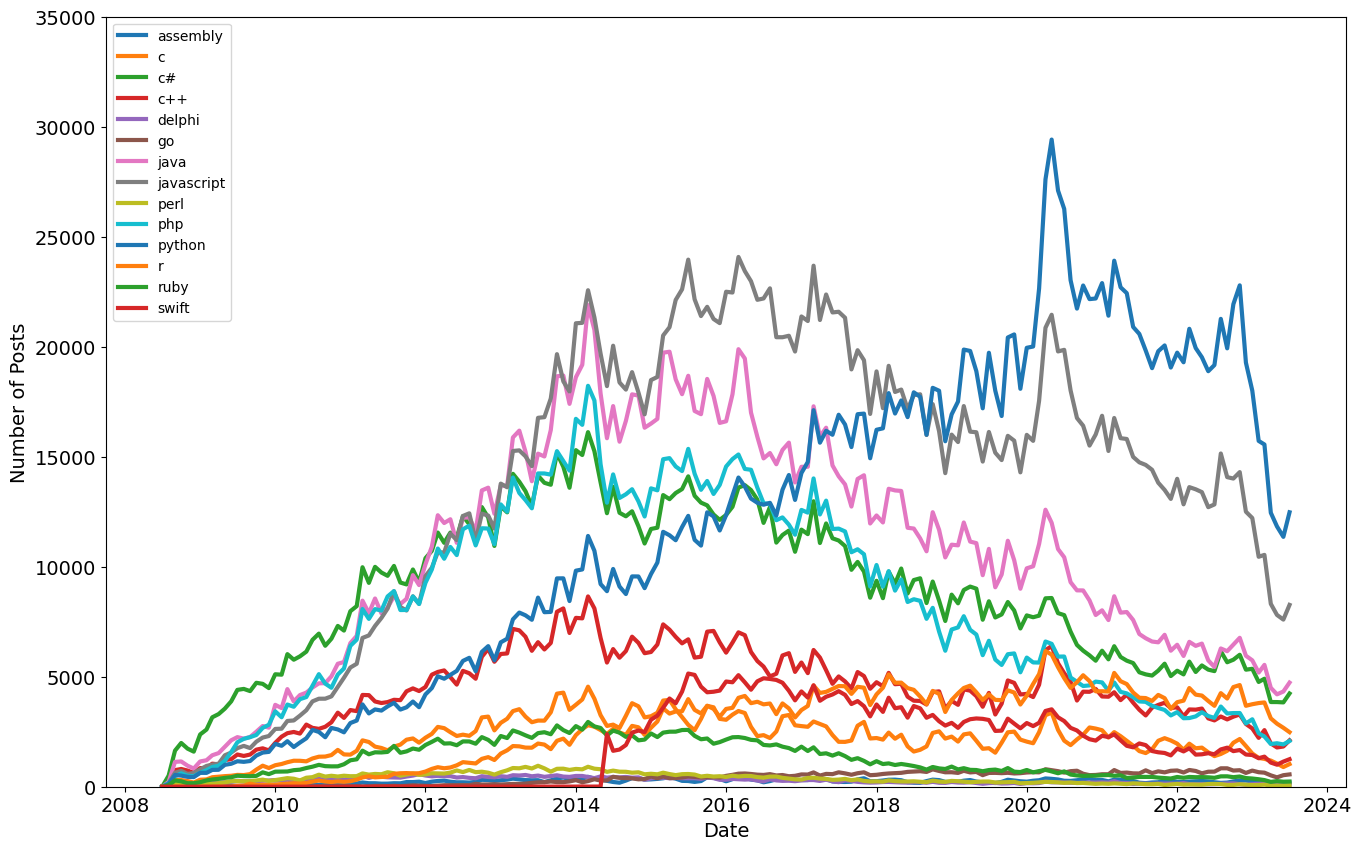

In [40]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
for col in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[col], label=f"{col}", linewidth=3)
    plt.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

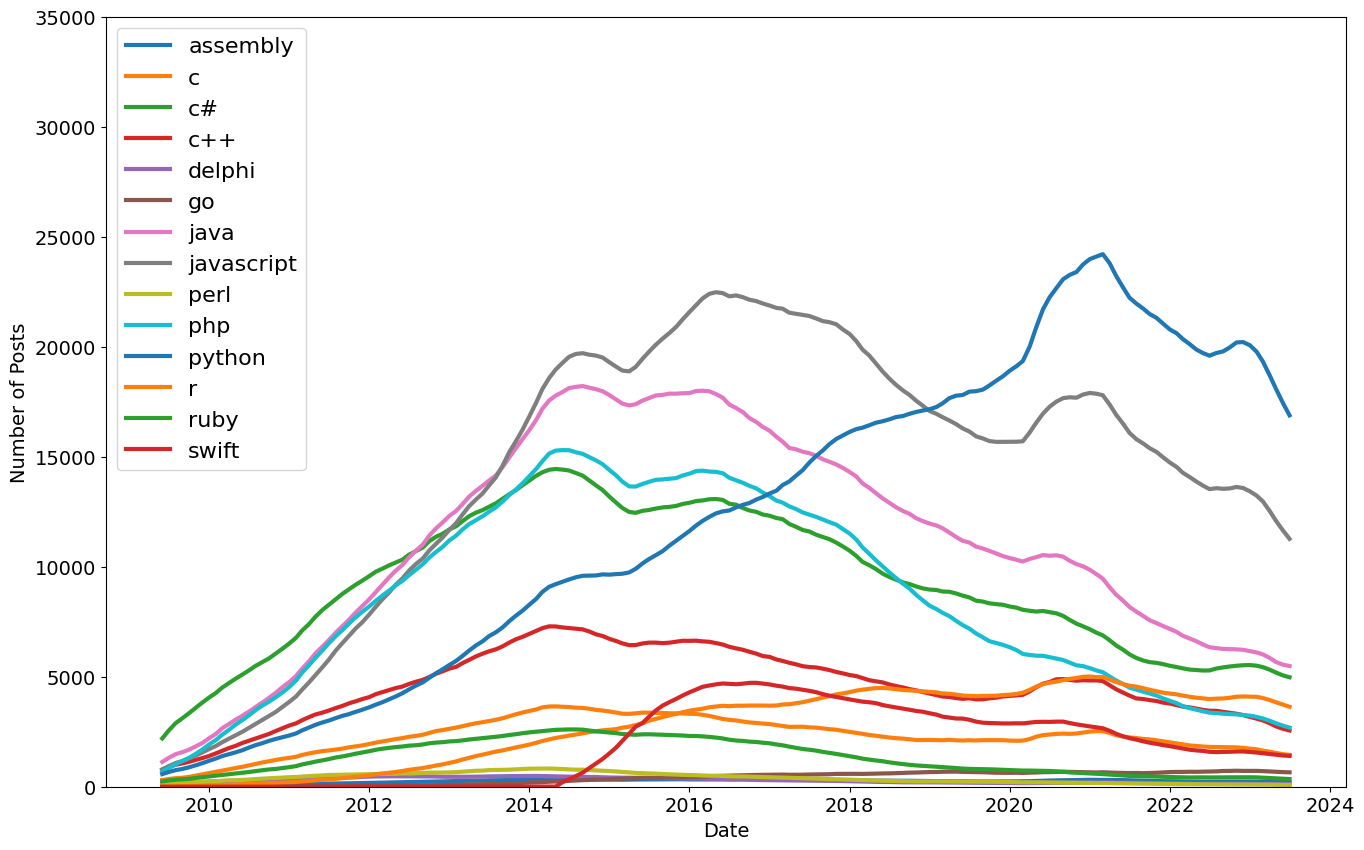

In [44]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)